In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import zscore
from sklearn import cluster

In [2]:
def get_data_from_excel(sheet):
        df = pd.read_excel(
            io="pooled_DESeq.xlsx",
            engine="openpyxl",
            sheet_name=sheet
        )
        return df

In [47]:
sample_info = get_data_from_excel('samples')
    
df_heat = get_data_from_excel('rlog')
df_heat = df_heat.drop(columns=['id', 'biotype'])
df_heat = df_heat.set_index('gene_name')
df_heat = zscore(df_heat, axis=1)
df_heat.rename(columns = dict(zip(sample_info.id.to_list(), sample_info.name.to_list())), inplace=True)


# Perform k-means clustering by using a pre-defined number of clusters

def kmeans(df, k=5):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(df)
    # Extract labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    df['cluster_k'] = labels
    df_kmean = df.sort_values(by=['cluster_k'])
    return df_kmean

df_heat = kmeans(df_heat, 5)

#color map for kmean
kcluster = df_heat.pop('cluster_k')
kcolor = sns.color_palette("hls", 5)
r_lut = dict(zip(kcluster.unique(), kcolor))
row_colors = kcluster.map(r_lut)
#color map for samples
samples = sample_info.pop('name')


In [33]:
kcluster

gene_name
AP001453.5    0
GIPC1         0
SNHG12        0
NOL8          0
MRPL42        0
             ..
PODNL1        4
TCEAL8        4
DCAF15        4
SELENOP       4
TRANK1        4
Name: cluster_k, Length: 19066, dtype: int32

In [24]:
row_colors

gene_name
AP001453.5                (0.86, 0.3712, 0.33999999999999997)
GIPC1                     (0.86, 0.3712, 0.33999999999999997)
SNHG12                    (0.86, 0.3712, 0.33999999999999997)
NOL8                      (0.86, 0.3712, 0.33999999999999997)
MRPL42                    (0.86, 0.3712, 0.33999999999999997)
                                   ...                       
PODNL1        (0.7871999999999999, 0.33999999999999997, 0.86)
TCEAL8        (0.7871999999999999, 0.33999999999999997, 0.86)
DCAF15        (0.7871999999999999, 0.33999999999999997, 0.86)
SELENOP       (0.7871999999999999, 0.33999999999999997, 0.86)
TRANK1        (0.7871999999999999, 0.33999999999999997, 0.86)
Name: cluster_k, Length: 19066, dtype: object

In [43]:
#color map for samples
sample_info = get_data_from_excel('samples')
sample_info = sample_info.iloc[:,1:3]
sample_info = sample_info.set_index('name')
trt = sample_info.trt
trt_color = sns.color_palette("Paired", trt.unique().size)
c_lut = dict(zip(trt.unique(), trt_color))
col_colors = trt.map(c_lut)

In [39]:
col_colors

name
scr_1        (0.6509803921568628, 0.807843137254902, 0.8901...
vcp65_1      (0.12156862745098039, 0.47058823529411764, 0.7...
vcp67_1      (0.12156862745098039, 0.47058823529411764, 0.7...
tfe330_1     (0.6980392156862745, 0.8745098039215686, 0.541...
tfe331_1     (0.6980392156862745, 0.8745098039215686, 0.541...
com6530_1       (0.2, 0.6274509803921569, 0.17254901960784313)
com6731_1       (0.2, 0.6274509803921569, 0.17254901960784313)
scr_2        (0.6509803921568628, 0.807843137254902, 0.8901...
vcp65_2      (0.12156862745098039, 0.47058823529411764, 0.7...
vcp67_2      (0.12156862745098039, 0.47058823529411764, 0.7...
tfe330_2     (0.6980392156862745, 0.8745098039215686, 0.541...
com6731_2       (0.2, 0.6274509803921569, 0.17254901960784313)
com6530_2       (0.2, 0.6274509803921569, 0.17254901960784313)
tfe331_2     (0.6980392156862745, 0.8745098039215686, 0.541...
scr_3        (0.6509803921568628, 0.807843137254902, 0.8901...
vcp65_3      (0.12156862745098039, 0.4705882352941

In [18]:
name

0         scr_3
1       vcp67_3
2       vcp67_3
3      tfe331_3
4      tfe331_3
5     com6731_3
6     com6731_3
7         scr_3
8       vcp67_3
9       vcp67_3
10     tfe331_3
11    com6731_3
12    com6731_3
13     tfe331_3
14        scr_3
15      vcp67_3
16      vcp67_3
17     tfe331_3
18     tfe331_3
19    com6731_3
20    com6731_3
Name: trt, dtype: object

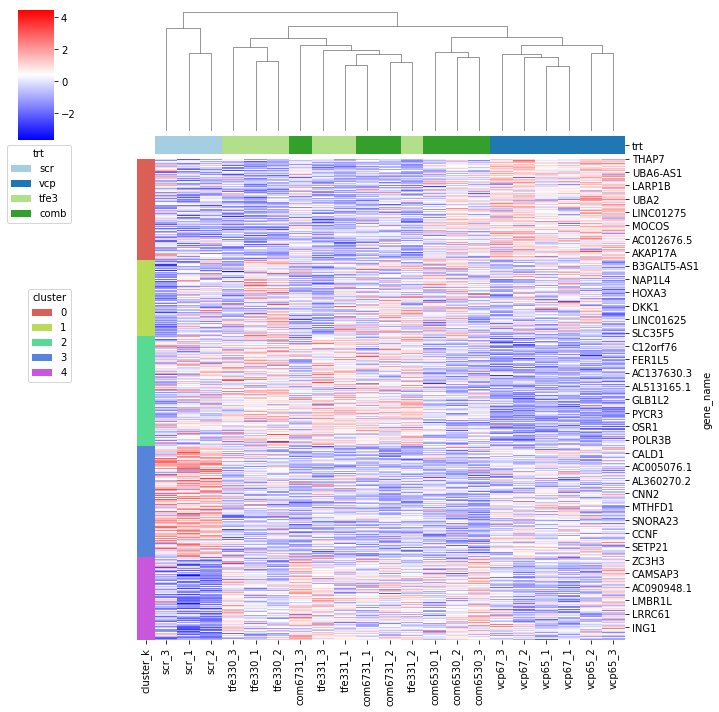

In [90]:
#import matplotlib.patches as mpatches
from matplotlib.pyplot import gcf

g = sns.clustermap(df_heat, row_cluster=False, cmap='bwr', 
                   row_colors=row_colors, col_colors=col_colors)
for label in kcluster.unique():
    g.ax_col_dendrogram.bar(0, 0, color=r_lut[label],
                            label=label, linewidth=0)
l1 = g.ax_col_dendrogram.legend(title = "cluster", ncol=1,
                               bbox_to_anchor=(0.1, 0.6), bbox_transform=gcf().transFigure)
for label in trt.unique():
    g.ax_row_dendrogram.bar(0, 0, color=c_lut[label], 
                            label=label, linewidth=0)

l2 = g.ax_row_dendrogram.legend(title = "trt", ncol=1, bbox_to_anchor=(0.1, 0.8), bbox_transform=gcf().transFigure)
plt.show()


In [69]:
for t in trt.unique():
    print(c_lut[t])

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)
(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)
(0.6980392156862745, 0.8745098039215686, 0.5411764705882353)
(0.2, 0.6274509803921569, 0.17254901960784313)
